In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os.path as path

JSON_PATH = path.join('/app','data', 'prs_por_orga_por_anio_filtrados.json')
print(JSON_PATH)

print('Reading data')
df = pd.read_json(JSON_PATH, lines=True)
print('Done')


/app/data/prs_por_orga_por_anio_filtrados.json
Reading data
Done


In [40]:
df.head()

,_id,month,year,organizationUrl,countStar
0,{'$oid': '5f9612435bacc72c71bfe8dc'},9,2019,"""https://github.com/Pandinosaurus""",8448
1,{'$oid': '5f9612435bacc72c71bfe8dd'},7,2019,"""https://github.com/Mattlk13""",14890
2,{'$oid': '5f9612435bacc72c71bfe8de'},11,2019,"""https://github.com/Pandinosaurus""",8377
3,{'$oid': '5f9612435bacc72c71bfe8df'},12,2019,"""https://github.com/Pandinosaurus""",7739
4,{'$oid': '5f9612435bacc72c71bfe8e0'},11,2019,"""https://github.com/NeatNerdPrime""",6182


In [59]:
df['organizationUrl'] = df['organizationUrl'].str.lower()
df

,_id,month,year,organizationUrl,countStar
0,{'$oid': '5f9612435bacc72c71bfe8dc'},9,2019,"""https://github.com/pandinosaurus""",8448
1,{'$oid': '5f9612435bacc72c71bfe8dd'},7,2019,"""https://github.com/mattlk13""",14890
2,{'$oid': '5f9612435bacc72c71bfe8de'},11,2019,"""https://github.com/pandinosaurus""",8377
3,{'$oid': '5f9612435bacc72c71bfe8df'},12,2019,"""https://github.com/pandinosaurus""",7739
4,{'$oid': '5f9612435bacc72c71bfe8e0'},11,2019,"""https://github.com/neatnerdprime""",6182
...,...,...,...,...,...
3170,{'$oid': '5f9612435bacc72c71bff53e'},12,2019,"""https://github.com/haut-se-oop""",500
3171,{'$oid': '5f9612435bacc72c71bff53f'},12,2017,"""https://github.com/gulajavaministudio""",500
3172,{'$oid': '5f9612435bacc72c71bff540'},3,2019,"""https://github.com/gulajavaministudio""",500
3173,{'$oid': '5f9612435bacc72c71bff541'},5,2019,"""https://github.com/philoserf-contribs""",500


In [60]:
with_counts = df.groupby(["organizationUrl", "month", "year"]).sum('countStar').reset_index()
with_counts

,organizationUrl,month,year,countStar
0,"""https://github.com/18f""",1,2016,681
1,"""https://github.com/18f""",1,2017,854
2,"""https://github.com/18f""",2,2016,825
3,"""https://github.com/18f""",2,2017,923
4,"""https://github.com/18f""",2,2018,532
...,...,...,...,...
3169,"""https://github.com/zys-contribs""",6,2019,1507
3170,"""https://github.com/zys-contribs""",7,2019,1528
3171,"""https://github.com/zys-contribs""",8,2019,1286
3172,"""https://github.com/zys-contribs""",11,2019,620


In [73]:
#grouped = with_counts.groupby(["month", "year"]).apply(lambda x: x.sort_values(['countStar'], ascending = False)).reset_index(drop=True)
#grouped
#final_data = grouped.groupby(["month", "year"]).head(10)
#final_data
grouped = with_counts.groupby(["month", "year"])

final_data = with_counts.loc[with_counts["countStar"] > 2000]
final_data

,organizationUrl,month,year,countStar
71,"""https://github.com/alphagov""",2,2018,2133
72,"""https://github.com/alphagov""",2,2019,2626
75,"""https://github.com/alphagov""",3,2018,2761
76,"""https://github.com/alphagov""",3,2019,2721
80,"""https://github.com/alphagov""",4,2019,2706
...,...,...,...,...
2563,"""https://github.com/potapy4""",10,2019,2779
2564,"""https://github.com/potapy4""",11,2019,2247
2912,"""https://github.com/test-organization-kkjeer""",10,2019,2218
2913,"""https://github.com/test-organization-kkjeer""",11,2019,2145


In [74]:
plot_data = pd.pivot_table(final_data, index=['year', 'month'], columns=['organizationUrl'])

plot_data

2018 2                                  2505.0   
     3                                  3366.0   
     4                                  2748.0   
     5                                  3545.0   
     6                                  3196.0   
     7                                  2839.0   
     8                                  3277.0   
     9                                  3178.0   
     10                                 4390.0   
     11                                 3321.0   
     12                                 2971.0   
2019 2                                  3500.0   
     3                                  4582.0   
     4                                  5411.0   
     5                                  4983.0   
     6                                  4819.0   
     7                                  5168.0   
     8                                  4760.0   
     9                                  4467.0   
     10                                 5821.0   
     11                                 4819.0   
     12                                 3913.0   
2020 1                                     NaN   

                                                    \
organizationUrl "https://github.com/microsoftdocs"   
year month                                           
2016 10                                        NaN   
     11                                        NaN   
     12                                        NaN   
2017 1                                         NaN   
     2                                         NaN   
     3                                         NaN   
     4                                         NaN   
     5                                         NaN   
     6                                         NaN   
     7                                         NaN   
     8                                         NaN   
     9                                         NaN   
     10                                        NaN   
     11                                        NaN   
     12                                        NaN   
2018 2                                         NaN   
     3                                         NaN   
     4                                         NaN   
     5                                         NaN   
     6                                         NaN   
     7                                         NaN   
     8                                         NaN   
     9                                         NaN   
     10                                     2779.0   
     11                                     2231.0   
     12                                     2339.0   
2019 2                                      4294.0   
     3                                      3088.0   
     4                                      3106.0   
     5                                      3793.0   
     6                                      3341.0   
     7                                      3355.0   
     8                                      2766.0   
     9                                      2658.0   
     10                                     2610.0   
     11                                        NaN   
     12                                        NaN   
2020 1                                         NaN   

                                              \
organizationUrl "https://github.com/mozilla"   
year month                                     
2016 10                                  NaN   
     11                                  NaN   
     12                                  NaN   
2017 1                                   NaN   
     2                                   NaN   
     3                                   NaN   
     4                                   NaN   
     5                                   NaN   
     6                                   NaN   
     7                                   NaN   
     8    

<AxesSubplot:xlabel='year,month'>

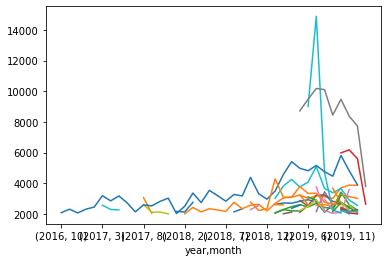

In [75]:
plot_data.plot(legend=False)